# Suicide Bombing Analysis Iraq

This analysis shows that suicide bombers prefer to work on Saturdays, Sundays and Mondays. 

A suicide bombing is roughly twice as likely to take place on one of these days than on the the other days of the week. 

In 2003, I worked as Head of an office of the International Committee of the Red Cross in Norther Iraq near the Syrian and Turkish borders. 

The US military intervention had just toppled the Baathist regime and Saddam Hussein was in hiding. The Islamic State did not yet exist and the level of violence was not comparable to what would soon follow. 

On August 19, 2003, a suicide bombing targetted the UN headquarters in Baghdad and killed 22 persons. A Red Cross employee was also assassinated at around the same time. 

As head of a delegation of 20 employees, I introduced measures to minimize the risk of being targeted. However, the situation continued to degenerate and foreign staff were pulled out. Iraqi staff were left on to their own devices.
                
At the time, there was little data on suicide bombings and Python was still in its infancy. We were managing a situation with a high level of uncertainty. 

Today, it is possible to do some analysis using available data. At the time, we did not know it but it turns out that suicide bombers are part timers.



Data source: Armed Conflict Location and Event Data Project (ACLED) https://acleddata.com)
Period: 01.01.2019 to 31.12.2019

### Data acquisition

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Install leaflet
# In terminal window, type 'conda install folium' (or 'pip install folium')

import folium
import matplotlib.pyplot as plt
import seaborn as sns

#display charts inline
%matplotlib inline

In [3]:
#acquire data
df_i = pd.read_csv("2006-01-01-2016-12-31-Middle_East-Iraq.csv")

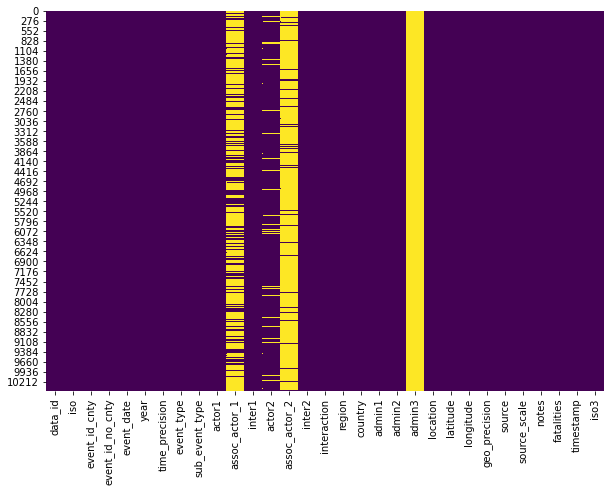

In [4]:
#display where missing values are located
plt.figure(figsize=(10,7))
sns.heatmap(df_i.isnull(), cbar = False, cmap = 'viridis')

In [5]:
#check data quality by displaying field types
#df_i.info()

In [6]:
#Add new date field
df_i['event_date_new'] =  pd.to_datetime(df_i['event_date'], format='%d %B %Y')
df_i.event_date_new.head(1)

0   2016-12-31
Name: event_date_new, dtype: datetime64[ns]

In [7]:
#Add the day of the week
df_i['day_of_week'] = df_i['event_date_new'].dt.day_name()

In [8]:
#Add a field to count aggregates
df_i['count'] = 1

In [9]:
#Fatalities by event_type & sub_event_type
f = df_i.groupby(["event_type", "sub_event_type"])["fatalities"].sum()
f.nlargest(10)

event_type                  sub_event_type                     
Battles                     Armed clash                            18077
Explosions/Remote violence  Air/drone strike                       17098
Battles                     Government regains territory            6418
Violence against civilians  Attack                                  5755
Explosions/Remote violence  Remote explosive/landmine/IED           3275
                            Suicide bomb                            3000
                            Shelling/artillery/missile attack       2241
Strategic developments      Disrupted weapons use                    299
Battles                     Non-state actor overtakes territory      100
Protests                    Excessive force against protesters        20
Name: fatalities, dtype: int64

In [10]:
#create a subset with only suicide bombings
sbomb = df_i[df_i['sub_event_type'] == 'Suicide bomb']

In [12]:
#suicide attack events by place
group7 = sbomb.groupby('admin1')['event_id_cnty'].count().reset_index()
zoo = group7.sort_values('event_id_cnty', ascending=False)
zoo

,admin1,event_id_cnty
2,Baghdad,70
0,Anbar,47
10,Sala al-Din,28
9,Ninewa,18
4,Diyala,11
5,Erbil,8
7,Kirkuk,8
1,Babylon,3
3,Basrah,2
8,Muthanna,2


In [13]:
#Plot map

#Baghdad coordinates
BAGHDAD = (33.3152, 44.3661)

#define map and zoom in
iraq_map = folium.Map(location=BAGHDAD,
                        zoom_start=6)

#loop through suicide bombings and place them on the map
for i in range(len(sbomb)):
    lat = sbomb.iloc[i][22]
    long = sbomb.iloc[i][23]

    folium.CircleMarker(location = [lat, long], fill = True).add_to(iraq_map)

In [14]:
#display interactive map (not visible in PDF)
iraq_map

In [16]:
#number of suicide bombs by day of week
group5 = sbomb.groupby('day_of_week')['count'].count().reset_index()
woo = group5.sort_values('count', ascending=False)
woo

,day_of_week,count
1,Monday,41
3,Sunday,39
2,Saturday,35
0,Friday,22
4,Thursday,22
5,Tuesday,21
6,Wednesday,19


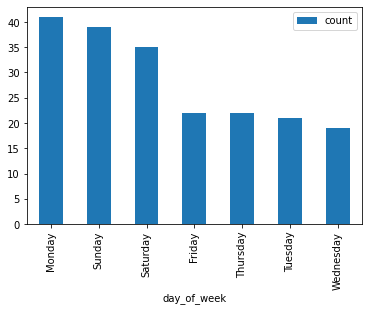

In [17]:
#Plot events by day of the week
my_plot = woo.plot(kind='bar', y='count', x='day_of_week')